#Prompt Engineering as an alternative to fine-tuning
Copyright 2023 Denis Rothman, MIT License

This notebook was designed with ChatGPT as a [Cobot(collaborative bot)](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Bonus/ChatGPT_as_a_Cobot_ChatGPT_versus_davinci_instruct.ipynb) on top of an [implementation of ChatGPT](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Bonus/Jump_Starting_ChatGPT_with_the_OpenAI_API.ipynb)<br>


**Fine-tuning or prompt engineering?**

Using large language models(LLM) [provides better power if required.](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Bonus/Q%26A_DR.ipynb)

However, it is not always possible or necessary to fine-tune a model to obtain exactly what we need.

Let's see what ChatGPT has to say:

a)**ChatGPT on prompt engineering:**<br>
"Prompt engineering can be a useful technique for improving the performance of language models like GPT-3 on specific tasks or domains without fine-tuning. **By carefully crafting prompts, you can guide the model to produce the desired output.**"

b)**ChatGPT on fine-tuning when it's possible:**<br>
"However, prompt engineering is not a replacement for fine-tuning in all cases. Fine-tuning is still the best way to achieve high accuracy on a specific task **when you have enough task-specific labeled data.** Fine-tuning allows the model to learn from the task-specific data and adjust its weights accordingly, leading to better performance on that task."

For fine-tuning OpenAI GPT-3 models or subsequent models, [read Chapter 7 of Transformers for NLP, 2nd Edition](https://www.amazon.com/Transformers-Natural-Language-Processing-architectures/dp/1803247339/ref=tmm_pap_swatch_0?_encoding=UTF8&qid=&sr=) and [run the fine-tuning notebook of the chapter.](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Chapter07/Fine_tuning_GPT_3.ipynb)

c)**ChatGPT on prompt engineering when fine-tuning is challenging**:<br>
"In contrast, **prompt engineering is useful when you don't have enough labeled data or when the task is not well-defined. For example, if you want to generate creative writing prompts or answer questions about a broad topic like history**, prompt engineering can help guide the model to generate relevant and informative responses."

Working on this information, this notebook will focus on prompt engineering when:

*   you don't have enough labeled data
*   when the task is not well-defined as in open conversations, for example
*   when the cost of fine-tuning exceeds the benefit of your project
*   when the topic is broad


#Prompt Engineering 

Advanced prompt engineering is not limited to entering a good prompt or question. This notebook will show you how to implement a transformer efficiently with advanced prompt engineering:<br>

1.Building the Knowledge base(KB)<br>
2.Parsing the user's prompt and accessing the KB<br>
3.Generating ChatGPT content with a dialog function<br>
4.Moderation, quality control<br>
5.Summary and next steps<br>

### Installing OpenAI

In [1]:
#Importing openai
try:
  import openai
except:
  !pip install openai
  import openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 9.8 MB/s eta 0:00:00


###Your API Key

In [2]:
#2.API Key
#Store you key in a file and read it(you can type it directly in the notebook but it will be visible for somebody next to you)
from google.colab import drive
drive.mount('/content/drive')
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

#The OpenAI Key
import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

Mounted at /content/drive


# 1.Building the Knowledge base(KB)

You can build the knowledge base, KB, in any format you want: SQL Server, other databases, JSON files, CSV, etc.

In this notebook, I'll use "Rothman Consulting" as an example. You can use the information you gather for your project and create a corporate or personal KB.


This step is a classical method to create data. When we build websites, for example, we enter metadata and keywords to increase our visibility and help the search engines. The same goes for our transformer conversational models.

Note: you can create as many assertions you wish in your KB. The only cost will be the space occupied by your data and the maintenance of your dataset. 


In [3]:
assert1={'role': 'assistant', 'content': 'Opening hours of Rothman Consulting :Monday through Friday 9am to 5pm. Services :expert systems, rule-based systems, machine learning, deep learning, transformer models.'}
assert2={'role': 'assistant', 'content': 'Services :expert systems, rule-based systems, machine learning, deep learning, transformer models.'}
assert3={'role': 'assistant', 'content': 'Services :Fine-tuning OpenAI GPT-3 models, designing datasets, designing knowledge bases.'}
assertn={'role': 'assistant', 'content': 'Services:advanced prompt engineering using a knowledge base and SEO keyword methods.'}

#Using the knowledge base as a dataset:
kbt = []
kbt.append(assert1)
kbt.append(assert2)
kbt.append(assert3)
kbt.append(assertn)

In [4]:
#displaying the KB as a DataFrame(DF) Clic on the magic Google Colaboratory Wand to obtain a cool display
import pandas as pd
df=pd.DataFrame(kbt)
df

,role,content
0,assistant,Opening hours of Rothman Consulting :Monday th...
1,assistant,"Services :expert systems, rule-based systems, ..."
2,assistant,"Services :Fine-tuning OpenAI GPT-3 models, des..."
3,assistant,Services:advanced prompt engineering using a k...


Let's add some metadata keywords for each record of the knowledge base

In [5]:
assertkw1="open"
assertkw2="expert"
assertkw3="services"
assertkwn="prompt"

In [6]:
#create a kb keywords as list
kbkw=[assertkw1,assertkw2,assertkw3,assertkwn]
#displaying the KB as a DataFrame(DF) Clic on the magic Google Colaboratory Wand to obtain a cool display
dfk=pd.DataFrame(kbkw)
dfk

,0
0,open
1,expert
2,services
3,prompt


In [7]:
user_requests=[]
user_requests.append({'role': 'user', 'content': 'At what time does Rothman Consulting open on Monday?'})
user_requests.append({'role': 'user', 'content': 'At what time does Rothman Consulting open on Saturday?'})
user_requests.append({'role': 'user', 'content': 'Can you create an AI-driven expert system?'})
user_requests.append({'role': 'user', 'content': 'What services does Rothman Consulting offer?'})

In [8]:
n=len(user_requests)

#2.Parsing the user's prompt and accessing the KB

There is a lot of work to do to create an efficient knowledge base, metadata, and a solid parsing function.

The example below parses the user's prompt on the dialog page of an application:<br>

1. Go through the list of keywords. Each keyword is the label of a record in the knowledge base (KB). You can extend the metadata (keywords) to as many keywords as necessary. You can also add other metadata as for web pages and parse them as well using search engine techniques.

2.When a keyword, the label of a KB record,  matches the user's request, the KB record is retrieved and returned to be part of the information sent to ChatGPT.

Note: You can improve this functin as you wish to customize your application.
A chatbot application can includes classical search functions.

Also, you can explore the new Bing conversational interface. You will note that it extracts keywords as in this notebook, then it searches for links in its knowledge base. Finally, it generates AI using the KB record(s). 

In this notebook, we added a moderation function (section 5, Moderation, quality control). Note that both the new Bing and OpenAI conversational bots contain a moderation function as well.








In [9]:
# This is an example. You can customize this as you wish for your project
def parse_user(uprompt,kbkw,kbt):
  i=0
  j=0
  for kw in kbkw:
    #print(i,kw)
    rq=str(uprompt)
    k=str(kw)
    fi=rq.find(k)
    if fi>-1:
      print(kw,rq,kbt[i])
      j=i
    i+=1
  return kbt[j]


#3..Generating ChatGPT content with a dialog function

Generating content with a function that fits the user's request using OpenAI ChatGPT through the gpt-3.5 turbo model.

This function will receive an automated prompt. 

For more on an explicit call see an [implementation of ChatGPT in the Bonus directory.](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Bonus/Jump_Starting_ChatGPT_with_the_OpenAI_API.ipynb)

In [10]:
#convmodel="gpt-3.5-turbo"
convmodel="gpt-4"
def dialog(iprompt):
    response = openai.ChatCompletion.create(
        model=convmodel,
        messages=iprompt
    )
    return response



## Implementing ChatGPT with a simplified search engine approach

The following cell contains 6 steps: <br>

Step 1: iterating through the user's requests   <br>
Step 2: the application goes through a the user's request and searches for keywords with a search-engine-like technique<br>
Step 3: the application creates a prompt, with a system message, the knowledge base record found and the initial user's request <br>
Step 4: The prompt is sent to the ChatGPT dialog function<br>
Step 5: storing the response in a list<br>
Step 6; displaying the KB as a DataFrame(DF);click on the magic Google Colaboratory Wand to obtain a cool display


In [11]:
responses=[]      #creating a list to store the dialog

#going through the user's requests in a batch for the ChatGPT simulation
for i in range(n):
  # Step 1: iterating through the user's requests
  user_request_num=i   
     
  #Step 2: the application goes through a the user's request and searches for keywords with a search-engine-like technique
  #        to find a record in the knowledge base
  kb_record=parse_user(user_requests[user_request_num],kbkw,kbt)
  
  #Step 3: the application creates a prompt, with a system message, the knowledge base record found and the initial user's request
  iprompt = []
  iprompt.append({"role": "system", "content": "You are an assistant for Rothman Consulting."})
  iprompt.append(kb_record)
  iprompt.append(user_requests[user_request_num])
  
  #print(iprompt)

  #Step 4: The prompt is sent to the ChatGPT dialog function
  response = dialog(iprompt)

  #Step 5: storing the response in a list
  ex=response["choices"][0]["message"]["content"]
  rt="Total Tokens:" + str(response["usage"]["total_tokens"])
  responses.append([user_requests[user_request_num],ex,rt])
  
#Step 6; displaying the KB as a DataFrame(DF);click on the magic Google Colaboratory Wand to obtain a cool display
pd.DataFrame(responses, columns=['request', 'response', 'tokens'])

open {'role': 'user', 'content': 'At what time does Rothman Consulting open on Monday?'} {'role': 'assistant', 'content': 'Opening hours of Rothman Consulting :Monday through Friday 9am to 5pm. Services :expert systems, rule-based systems, machine learning, deep learning, transformer models.'}
open {'role': 'user', 'content': 'At what time does Rothman Consulting open on Saturday?'} {'role': 'assistant', 'content': 'Opening hours of Rothman Consulting :Monday through Friday 9am to 5pm. Services :expert systems, rule-based systems, machine learning, deep learning, transformer models.'}
expert {'role': 'user', 'content': 'Can you create an AI-driven expert system?'} {'role': 'assistant', 'content': 'Services :expert systems, rule-based systems, machine learning, deep learning, transformer models.'}
services {'role': 'user', 'content': 'What services does Rothman Consulting offer?'} {'role': 'assistant', 'content': 'Services :Fine-tuning OpenAI GPT-3 models, designing datasets, designing 

,request,response,tokens
0,"{'role': 'user', 'content': 'At what time does...",Rothman Consulting opens at 9am on Monday.,Total Tokens:83
1,"{'role': 'user', 'content': 'At what time does...",Rothman Consulting is not open on Saturdays. T...,Total Tokens:97
2,"{'role': 'user', 'content': 'Can you create an...","As an AI language model, I can help design and...",Total Tokens:415
3,"{'role': 'user', 'content': 'What services doe...",Rothman Consulting offers a wide range of serv...,Total Tokens:336


#4.Moderation, quality control

OpenAI provides[ tools](https://https://openai.com/blog/new-and-improved-content-moderation-tooling) to control the input and output flow of their models.

You can control the output of the implementation of ChatGPT in at least two ways: <br>
**1.By parsing the output, searching for keywords, and then taking an action to block the output or modifying with a rule-base**<br>

This is the method ChatGPT suggests:<br>
"Yes, it is possible to implement a moderation model in Python. Many different approaches can be used to build a moderation model, depending on the specific requirements and use case.

One approach is to use machine learning algorithms to automatically detect and flag inappropriate content. This could involve training a machine learning model on a labeled dataset of inappropriate content, and using the model to classify new content as either appropriate or inappropriate. There are many libraries and frameworks available in Python for building machine learning models, such as TensorFlow, Scikit-learn, and Keras.

Another approach is to use a rule-based system to detect and flag inappropriate content. This could involve defining a set of rules or criteria that content must meet in order to be considered appropriate, and then using Python to automatically check content against these rules.

Ultimately, the specific approach that is used will depend on the requirements and constraints of the moderation task. However, Python provides a flexible and powerful platform for building moderation models, and there are many resources available online to help developers get started with building their own moderation models."

**2.You can use OpenAI's [moderation model](https://https://platform.openai.com/docs/guides/moderation/overview)**<br>

Bing's chatbot provides this description of OpenAI's moderation model: <br>
"OpenAI has a moderation model that you can use to check whether content complies with OpenAI’s usage policies1. The model classifies content into categories such as hate speech, sexual content, violence, etc. and gives a probability score for each category. You can use this endpoint to filter out inappropriate or harmful content generated by other OpenAI models."

OpenAI states that the category of an output:

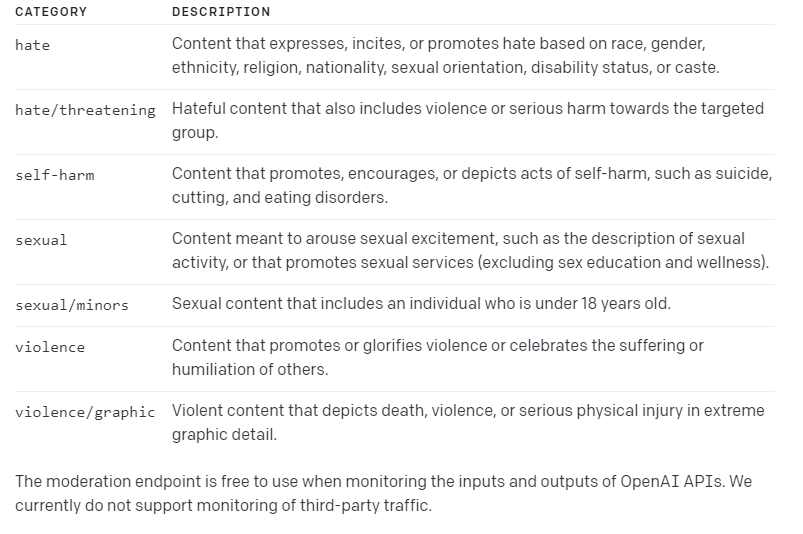

A Python example of the moderation model using one of the responses of the notebook.

In [12]:
text = "I apologize for the confusion in my previous message. Rothman Consulting is open only from Monday through Friday from 9 AM to 5 PM. We are closed on weekends, including Saturdays. If you have any further queries, please let us know."
response = openai.Moderation.create(input=text)

Displaying the details of the response(JSON object) 

In [13]:
response["results"][0]["categories"]

<OpenAIObject at 0x7f817071f4f0> JSON: {
  "hate": false,
  "hate/threatening": false,
  "self-harm": false,
  "sexual": false,
  "sexual/minors": false,
  "violence": false,
  "violence/graphic": false
}

In [14]:
response["results"][0]["category_scores"]

<OpenAIObject at 0x7f81706f60e0> JSON: {
  "hate": 6.704667612211779e-07,
  "hate/threatening": 2.6214225234966193e-10,
  "self-harm": 3.959942151965379e-09,
  "sexual": 6.882449952172465e-07,
  "sexual/minors": 2.4538612919400293e-08,
  "violence": 1.5880637874943204e-05,
  "violence/graphic": 7.89500518294517e-07
}

Flagged as sensitive "True" or "False"

In [15]:
response["results"][0]["flagged"]

False

#5.Summary and next steps

We saw how:
* advanced prompt engineering can be an efficient solution to customize ChatGPT
* to build a knowledge base that you can improve through prompt engineering 
* to run ChatGPT with advanced prompt engineering
* to use OpenAI's moderation model to monitor the output of ChatGPT, any OpenAI model, or any text

Next steps:

* automate the whole process of this notebook in a pipeline
* build an application
* once the knowledge base is reliable, you can use it to [fine-tune](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Chapter07/Fine_tuning_GPT_3.ipynb) an OpenAI transformer model
